In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')       #dataset is of type DataFrame
X = dataset.iloc[:,1:-1].values           #using .values generates array
y = dataset.iloc[:,-1].values             #x & y is of type np.ndarray

print(X)
#No Splitting,because veruy few data

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


Though this is the same dataset as Tutorial 4, here we are Using the feature scaling.

Because ,unlike other algorithm SVR in sklearn doesn't contain feature scaling by default.

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

sc_X.fit(X)
X = sc_X.transform(X)
y = sc_y.fit_transform(y.reshape((len(y),1)))

print(sc_X.transform(np.array([[6.5]])))

[[0.34815531]]


In [ ]:
#Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Predicting a new result
X_pred = sc_X.transform(np.array([[6.5]]))                        #Alternative way of this by reshape has been shown previous tutorial
y_pred = regressor.predict(X_pred)                                #Y_pred is the scaled version of salary
y_pred_value = sc_y.inverse_transform(y_pred)                     #So,using inverse transform

print(y_pred_value)                   

[170370.0204065]


Text(0, 0.5, 'Salary')

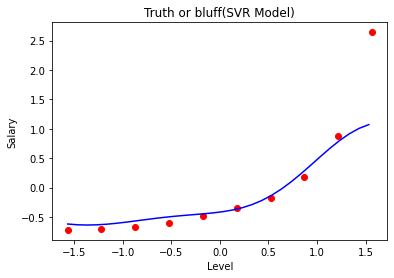

In [ ]:
#Visualizing the Support Vector Regression results
X_grid = np.arange(min(X) , max(X) ,0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color = 'red')
plt.plot(X_grid ,regressor.predict(X_grid) , color = 'blue')
plt.title('Truth or bluff(SVR Model)')
plt.xlabel("Level")
plt.ylabel("Salary")